# Where Do Goals Come From: Takeaways

In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<AxesSubplot:title={'center':'Time to Goal After Takeaway'}, xlabel='Time (seconds)', ylabel='Number of Occurrences'>

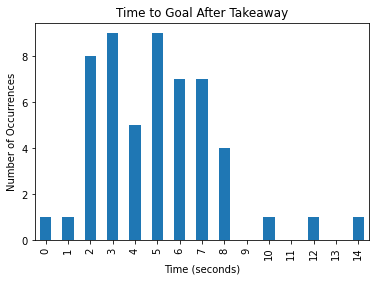

In [31]:
#Time to goal (in seconds) after Takeaway
timeocc = pd.read_csv('Time Occurrences.csv')
timeocc['Occurrences'].plot(kind='bar', title='Time to Goal After Takeaway', xlabel="Time (seconds)", 
                            ylabel= "Number of Occurrences")

<AxesSubplot:title={'center':'Sequences to Goal After Takeaway'}, xlabel='Sequence Number', ylabel='Number of Occurrences'>

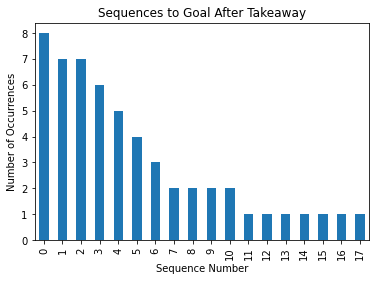

In [34]:
#Event occurrences after Takeaway
flow = pd.read_csv('Flow List.csv')
flow['Occurrences'].plot(kind='bar', title='Sequences to Goal After Takeaway', xlabel="Sequence Number", 
                            ylabel= "Number of Occurrences")

In [4]:
scout = pd.read_csv("ScoutSavePoint.csv")
scout

,Unnamed: 0,Unnamed: 0.1,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,...,events_Play,events_Puck Recovery,events_Shot,events_Takeaway,events_Zone Entry,zones_Def. Board,zones_Def. Zone,zones_Neutral,zones_Off. Board,zones_Off. Zone
0,0,0,2019-09-20,Erie Otters,Sudbury Wolves,1,20:00,5,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,2019-09-20,Erie Otters,Sudbury Wolves,1,19:58,5,5,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,2,2019-09-20,Erie Otters,Sudbury Wolves,1,19:53,5,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,3,2019-09-20,Erie Otters,Sudbury Wolves,1,19:52,5,5,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,4,2019-09-20,Erie Otters,Sudbury Wolves,1,19:51,5,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75868,75868,75868,2020-03-08,Erie Otters,Saginaw Spirit,3,0:07,6,5,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75869,75869,75869,2020-03-08,Erie Otters,Saginaw Spirit,3,0:06,6,5,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75870,75870,75870,2020-03-08,Erie Otters,Saginaw Spirit,3,0:04,6,5,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75871,75871,75871,2020-03-08,Erie Otters,Saginaw Spirit,3,0:03,6,5,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
#Getting Time

#Create Conditions to make sure values from periods don't overlap
conditions = [(scout["Period"] == 1), (scout["Period"] == 2), (scout["Period"] == 3)]

#Adding hours to make sure clock time can be converted to timedeltas
#scout["Clock"] = "00:" + scout["Clock"].astype(str)
#Convert to timedeltas then the seconds
z = pd.to_timedelta('00:' + scout["Clock"])
z = z.dt.total_seconds()
z_difference = abs(z.diff())
values = [abs(z.diff()), abs(z.diff()), abs(z.diff())]

#Adding a new column with second differences
scout["Time_Delta"] = np.select(conditions, values)

#Fill original NA value as 0
scout["Time_Delta"].fillna(0, inplace=True)

#To get change in time after X event, just add the times after the first event
scout['Time_DeltaN1'] = scout['Time_Delta'].shift(-1) #This one is normal
scout['Time_DeltaN2'] = scout['Time_DeltaN1'] + scout['Time_Delta'].shift(-2)
scout['Time_DeltaN3'] = scout['Time_DeltaN2'] + scout['Time_Delta'].shift(-3)
scout['Time_DeltaN4'] = scout['Time_DeltaN3'] + scout['Time_Delta'].shift(-4)
scout['Time_DeltaN5'] = scout['Time_DeltaN4'] + scout['Time_Delta'].shift(-5)

In [6]:
scout[["Time_Delta",'Time_DeltaN1','Time_DeltaN2', 'Time_DeltaN3', 'Time_DeltaN4', 'Time_DeltaN5']].head(10)

,Time_Delta,Time_DeltaN1,Time_DeltaN2,Time_DeltaN3,Time_DeltaN4,Time_DeltaN5
0,0.0,2.0,7.0,8.0,9.0,12.0
1,2.0,5.0,6.0,7.0,10.0,13.0
2,5.0,1.0,2.0,5.0,8.0,14.0
3,1.0,1.0,4.0,7.0,13.0,14.0
4,1.0,3.0,6.0,12.0,13.0,15.0
5,3.0,3.0,9.0,10.0,12.0,12.0
6,3.0,6.0,7.0,9.0,9.0,13.0
7,6.0,1.0,3.0,3.0,7.0,7.0
8,1.0,2.0,2.0,6.0,6.0,8.0
9,2.0,0.0,4.0,4.0,6.0,9.0


In [7]:
scout['Event'].value_counts()

Play               23778
Puck Recovery      20667
Incomplete Play     8890
Zone Entry          6362
Dump In/Out         4888
Shot                4887
Takeaway            3248
Faceoff Win         2441
Penalty Taken        419
Goal                 293
Name: Event, dtype: int64

In [8]:
#Next event after Takeaway
one_next = scout.loc[scout['Event'] == 'Takeaway', 'next_event']
one_next.value_counts()

Play               1411
Incomplete Play     670
Dump In/Out         373
Zone Entry          236
Puck Recovery       224
Shot                120
Takeaway            115
Penalty Taken        55
Faceoff Win          38
Goal                  6
Name: next_event, dtype: int64

In [9]:
#create two events after takeaway
scout['2next_event'] = scout['Event'].shift(-2)
scout['2next_x'] = scout['next_x'].shift(-2)
scout['2next_y'] = scout['next_y'].shift(-2)
two_next = scout.loc[scout['Event'] == 'Takeaway', '2next_event']
two_next.value_counts()

Puck Recovery      982
Play               801
Zone Entry         397
Incomplete Play    323
Takeaway           209
Shot               199
Dump In/Out        189
Faceoff Win        121
Goal                15
Penalty Taken       12
Name: 2next_event, dtype: int64

In [10]:
#Three events after Takeaway
scout['3next_event'] = scout['Event'].shift(-3)
scout['3next_x'] = scout['next_x'].shift(-3)
scout['3next_y'] = scout['next_y'].shift(-3)
three_next = scout.loc[scout['Event'] == 'Takeaway', '3next_event']
three_next.value_counts()

Play               998
Puck Recovery      867
Incomplete Play    388
Zone Entry         310
Shot               238
Dump In/Out        184
Takeaway           133
Faceoff Win        102
Penalty Taken       15
Goal                13
Name: 3next_event, dtype: int64

In [11]:
#Four events after takeaway
scout['4next_event'] = scout['Event'].shift(-4)
scout['4next_x'] = scout['next_x'].shift(-4)
scout['4next_y'] = scout['next_y'].shift(-4)
four_next = scout.loc[scout['Event'] == 'Takeaway', '4next_event']
four_next.value_counts()

Play               1024
Puck Recovery       911
Incomplete Play     345
Zone Entry          272
Dump In/Out         210
Shot                208
Takeaway            131
Faceoff Win         115
Goal                 16
Penalty Taken        16
Name: 4next_event, dtype: int64

In [12]:
#Five events after takeaway
scout['5next_event'] = scout['Event'].shift(-5)
scout['5next_x'] = scout['next_x'].shift(-5)
scout['5next_y'] = scout['next_y'].shift(-5)
five_next = scout.loc[scout['Event'] == 'Takeaway', '5next_event']
five_next.value_counts()

Play               1002
Puck Recovery       838
Incomplete Play     413
Zone Entry          304
Dump In/Out         211
Shot                196
Takeaway            138
Faceoff Win         118
Penalty Taken        17
Goal                 11
Name: 5next_event, dtype: int64

In [14]:
#Time one event after takeaway leading to a goal
next_goaltime = scout.loc[(scout['Event'] == 'Takeaway') & (scout['next_event'] == 'Goal'),'Time_DeltaN1']
next_goaltime.value_counts()

2.0    2
5.0    1
3.0    1
0.0    1
1.0    1
Name: Time_DeltaN1, dtype: int64

In [15]:
#Look for events that lead to goal
#1 Event: Would just be the goal, so I'd need the x-y position from where it was taken, to takeaway position
#2 Event: Same as above, but would need 1-event position
twonext_goal = scout.loc[(scout['Event'] == 'Takeaway') & (scout['2next_event'] == 'Goal'),'next_event']
twonext_goal.value_counts()

Zone Entry    8
Play          7
Name: next_event, dtype: int64

In [16]:
#Time two events after takeaway leading to a goal
twonext_goaltime = scout.loc[(scout['Event'] == 'Takeaway') & (scout['2next_event'] == 'Goal'),'Time_DeltaN2']
twonext_goaltime.value_counts()

3.0    6
2.0    5
5.0    2
5.0    1
6.0    1
Name: Time_DeltaN2, dtype: int64

In [19]:
#Similar logic for goals that occur 3-5 events after takeaways + time occurrences in seconds
#Had to take away Takeaway goals from opposing team to avoid redundant data
threenext_goal = scout.loc[(scout['Event'] == 'Takeaway') & (scout['2next_event'] != 'Takeaway') &
                           (scout['3next_event'] == 'Goal'),  ['next_event','2next_event']]
threenext_goal.value_counts()

next_event     2next_event
Play           Zone Entry     7
Zone Entry     Play           2
Puck Recovery  Play           1
Play           Play           1
dtype: int64

In [20]:
threenext_goaltime = scout.loc[(scout['Event'] == 'Takeaway') & (scout['2next_event'] != 'Takeaway') &
                               (scout['3next_event'] == 'Goal'),'Time_DeltaN3']
threenext_goaltime.value_counts()

4.0     3
5.0     2
3.0     2
6.0     1
12.0    1
7.0     1
6.0     1
Name: Time_DeltaN3, dtype: int64

In [21]:
fournext_goal = scout.loc[(scout['Event'] == 'Takeaway') & (scout['2next_event'] != 'Takeaway') &
                          (scout['4next_event'] == 'Goal'), ['next_event', '2next_event', '3next_event']]
fournext_goal.value_counts()

next_event  2next_event  3next_event  
Play        Zone Entry   Play             5
            Play         Zone Entry       4
Zone Entry  Play         Play             3
Play        Play         Play             2
Zone Entry  Shot         Puck Recovery    1
dtype: int64

In [22]:
fournext_goaltime = scout.loc[(scout['Event'] == 'Takeaway') & (scout['2next_event'] != 'Takeaway') &
                              (scout['4next_event'] == 'Goal'),'Time_DeltaN4']
fournext_goaltime.value_counts()

6.0     4
8.0     2
4.0     2
5.0     2
7.0     2
2.0     1
10.0    1
7.0     1
Name: Time_DeltaN4, dtype: int64

In [23]:
fivenext_goal = scout.loc[(scout['Event'] == 'Takeaway') & (scout['2next_event'] != 'Takeaway') &
                          (scout['3next_event'] != 'Takeaway') & (scout['4next_event'] != 'Takeaway') &
                          (scout['5next_event'] == 'Goal'), ['next_event', '2next_event', '3next_event', '4next_event']]
fivenext_goal.value_counts()

next_event       2next_event  3next_event    4next_event  
Play             Zone Entry   Play           Play             2
                 Play         Zone Entry     Play             2
Zone Entry       Play         Shot           Puck Recovery    1
                              Play           Play             1
Play             Play         Play           Play             1
Incomplete Play  Faceoff Win  Puck Recovery  Play             1
dtype: int64

In [24]:
fivenext_goaltime = scout.loc[(scout['Event'] == 'Takeaway') & (scout['2next_event'] != 'Takeaway') & (scout['2next_event'] != 'Faceoff Win') &
                          (scout['3next_event'] != 'Takeaway') & (scout['4next_event'] != 'Takeaway') &
                              (scout['5next_event'] == 'Goal'),'Time_DeltaN5']
fivenext_goaltime.value_counts()

7.0     3
8.0     2
14.0    1
5.0     1
Name: Time_DeltaN5, dtype: int64